In [1]:
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

# Missing Values

In [5]:
both = pd.concat((train.drop(["SalePrice"], axis = 1), test))

In [65]:
both.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [23]:
both.shape

(2919, 80)

In [13]:
both_na = both.isnull().sum().sort_values(ascending = False)
both_na[both_na != 0]

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
Exterior1st        1
Exterior2nd        1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64

### Missing Values: PoolQC
PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [66]:
both.filter(like = 'Pool', axis = 1).columns.values

array(['PoolArea', 'PoolQC'], dtype=object)

In [37]:
both[both.PoolQC.notnull()][['PoolArea', 'PoolQC']]

,PoolArea,PoolQC
197,512,Ex
810,648,Fa
1170,576,Gd
1182,555,Ex
1298,480,Gd
1386,519,Fa
1423,738,Gd
514,144,Ex
1113,228,Ex
1250,800,Gd


In [34]:
both[both.PoolArea != 0][["PoolArea", "PoolQC"]]

,PoolArea,PoolQC
197,512,Ex
810,648,Fa
1170,576,Gd
1182,555,Ex
1298,480,Gd
1386,519,Fa
1423,738,Gd
514,144,Ex
960,368,NaN
1043,444,NaN


In [45]:
both.loc[(both['PoolArea'] != 0) & (both['PoolQC'].isnull())][['PoolArea', 'PoolQC', 'OverallQual', 'OverallCond']]

,PoolArea,PoolQC,OverallQual,OverallCond
960,368,NaN,4,6
1043,444,NaN,6,5
1139,561,NaN,3,5


In [39]:
both['PoolQC'].value_counts()

Gd    4
Ex    4
Fa    2
Name: PoolQC, dtype: int64

In [64]:
both.groupby('PoolQC').agg({'OverallQual': ['min','mean', 'max']})

OverallQual          
               min  mean max
PoolQC                      
Ex               8  9.00  10
Fa               6  6.50   7
Gd               6  7.25  10

PoolQC will be filled in with 'Fa' when OverallQual is 3 or 4 and it will be filled in with 'Gd' when OverallQual is 6. Otherwise, it will be None.

### Missing Values: MiscFeature
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [67]:
both.filter(like = 'Misc', axis = 1).columns.values

array(['MiscFeature', 'MiscVal'], dtype=object)

In [71]:
both[both.MiscFeature.notnull()][['MiscFeature', 'MiscVal']].head()

,MiscFeature,MiscVal
5,Shed,700
7,Shed,350
16,Shed,700
17,Shed,500
51,Shed,400


In [72]:
both.loc[(both['MiscVal'] != 0) & (both['MiscFeature'].isnull())][['MiscFeature', 'MiscVal']]

,MiscFeature,MiscVal
1089,NaN,17000


In [73]:
both.groupby('MiscFeature').agg({'MiscVal': ['min','mean', 'max']})

MiscVal               
                min    mean    max
MiscFeature                       
Gar2           3000  8760.0  15500
Othr              0  3250.0   6500
Shed              0   763.8   4500
TenC           2000  2000.0   2000

MiscFeature will be filled in with 'Gar2' when MiscVal is not 0. Otherwise it will be None.

### Missing Values: Alley
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [75]:
both["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [76]:
both.loc[(both['Alley'].isnull())][['Alley', 'Street']]

,Alley,Street
0,NaN,Pave
1,NaN,Pave
2,NaN,Pave
3,NaN,Pave
4,NaN,Pave
5,NaN,Pave
6,NaN,Pave
7,NaN,Pave
8,NaN,Pave
9,NaN,Pave


## Filling in missing values
Special cases:

In [ ]:
# PoolQC
both.loc[(both['PoolArea'] != 0) & (both['PoolQC'].isnull() & (both['OverallQual'] == 3 | both['OverallQual'] == 4))] = 'Fa'
both.loc[(both['PoolArea'] != 0) & (both['PoolQC'].isnull() & (both['OverallQual'] == 6))] = 'Gd'

# MiscFeature
both.loc[(both['MiscVal'] != 0) & (both['MiscFeature'].isnull())] = 'Gar2'

In [ ]:
# PoolQC
train = train.fillna({"PoolQC": "None"})
test = test.fillna({"PoolQC": "None"})

# MiscFeature
train = train.fillna({"MiscFeature": "None"})
test = test.fillna({"MiscFeature": "None"})

In [ ]:
train_na = train.isnull().sum().sort_values(ascending = False)
train_na[train_na != 0]

In [ ]:
test_na = test.isnull().sum().sort_values(ascending = False)
test_na[test_na != 0]

# SalePrice

In [3]:
train["SalePrice"].describe()
# No negative price

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

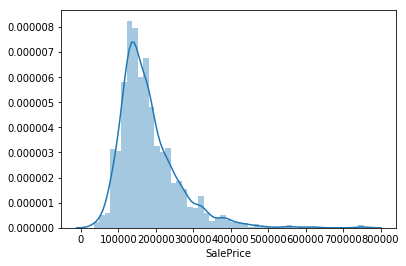

In [4]:
sns.distplot(train["SalePrice"])
